In [230]:
from kMeans import kMtune
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE

from sklearn.preprocessing import PowerTransformer
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
from sklearn.decomposition import PCA
from tqdm import tqdm
from colour import Color
from functions import *


In [231]:
cols = ['level', 'exp', 
        'rocket', 'glider', 
        'friends', 'likes', 
        'GameTime', 
        'NumberOfAnnotatedGraffiti', 'totalAnnotatedGraffiti', 'Graffiti_avgt',
        'NumberOfDialoguesActivated', 'totalAnnotatedDialogues', 'Dialogue_avgt']

categorical = ['Age', 'Gender', 'Education',
       'General engagement', 'GenderEnvironment']

## KMEANS

#### Step by step process

treating feature level...
treating feature exp...
treating feature rocket...
treating feature glider...
treating feature friends...
treating feature likes...
treating feature GameTime...
treating feature NumberOfAnnotatedGraffiti...
treating feature totalAnnotatedGraffiti...
treating feature Graffiti_avgt...
treating feature NumberOfDialoguesActivated...
treating feature totalAnnotatedDialogues...
treating feature Dialogue_avgt...


<Axes: >

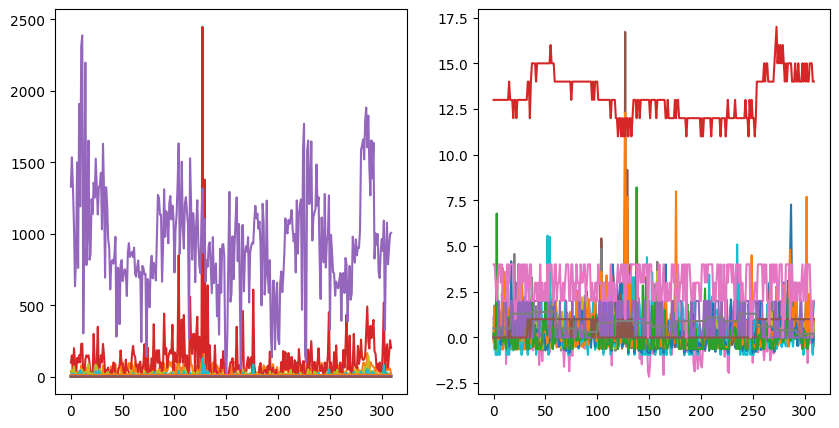

In [232]:
df = pd.read_csv('CleanData/HSS_kmeans.csv',sep=';')
cl_df = df[cols + categorical].copy(deep=True)
fig, axs =  plt.subplots(1,2, figsize=(10, 5)) 
cl_df.plot(legend=False, ax=axs[0])
for c in cols:
    print(f'treating feature {c}...')
    # print(f'{c}, {cl_df[c].isna().value_counts()}')
    if cl_df[c].isna().value_counts().shape[0] > 1:
        #fill missing values or nan with 0 (according to internship tutor)
        cl_df[c] = cl_df[c].fillna(0).copy(deep=True)
        #now we scale the variables
    cl_df[c] = RobustScaler().fit_transform(cl_df[[c]])
cl_df.columns        
cl_df.plot(legend=False, ax=axs[1])

As an heuristic k-means will be set to 3 for simplicity.

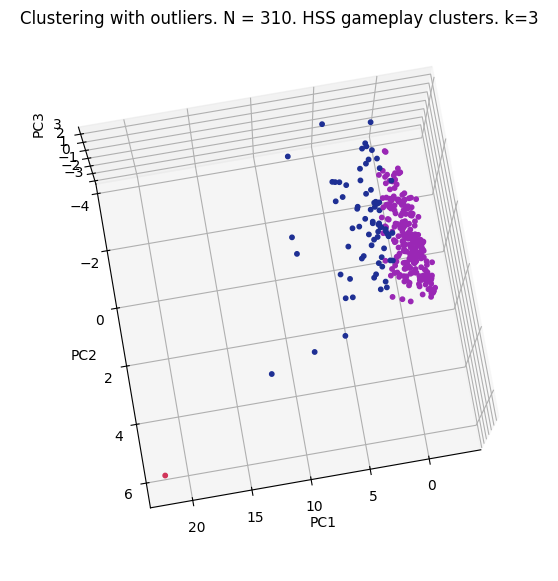

In [170]:
K = 3

kmeans = KMeans(n_clusters=K, random_state=25)
        
kmlabels = kmeans.fit_predict(cl_df)

# un/freeze the following to un/obtain a static visualization

colors = list(Color('#1e2f94').range_to(Color("#d13459"), K))
colors = [str(color) for color in colors]
cmap_custom = ListedColormap(colors)

pca = PCA(n_components=3)
    
reduced_features = pca.fit_transform(cl_df)
reduced_g = pd.DataFrame(reduced_features, index=cl_df.index, columns=['PC1','PC2', 'PC3'])
reduced_g['cluster'] = kmlabels
xdata = reduced_g['PC1']
ydata = reduced_g['PC2']
zdata = reduced_g['PC3']
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(xdata, ydata, zdata, c=kmlabels, cmap=cmap_custom, s=10, alpha=1)
    
ax.view_init(elev=80, azim=80)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3', rotation = 90)
plt.title(f'Clustering with outliers. N = {reduced_g.shape[0]}. HSS gameplay clusters. k={K}')

plt.savefig("Graphs/First_kmeans_with_outliers.png", dpi=500)
plt.show()

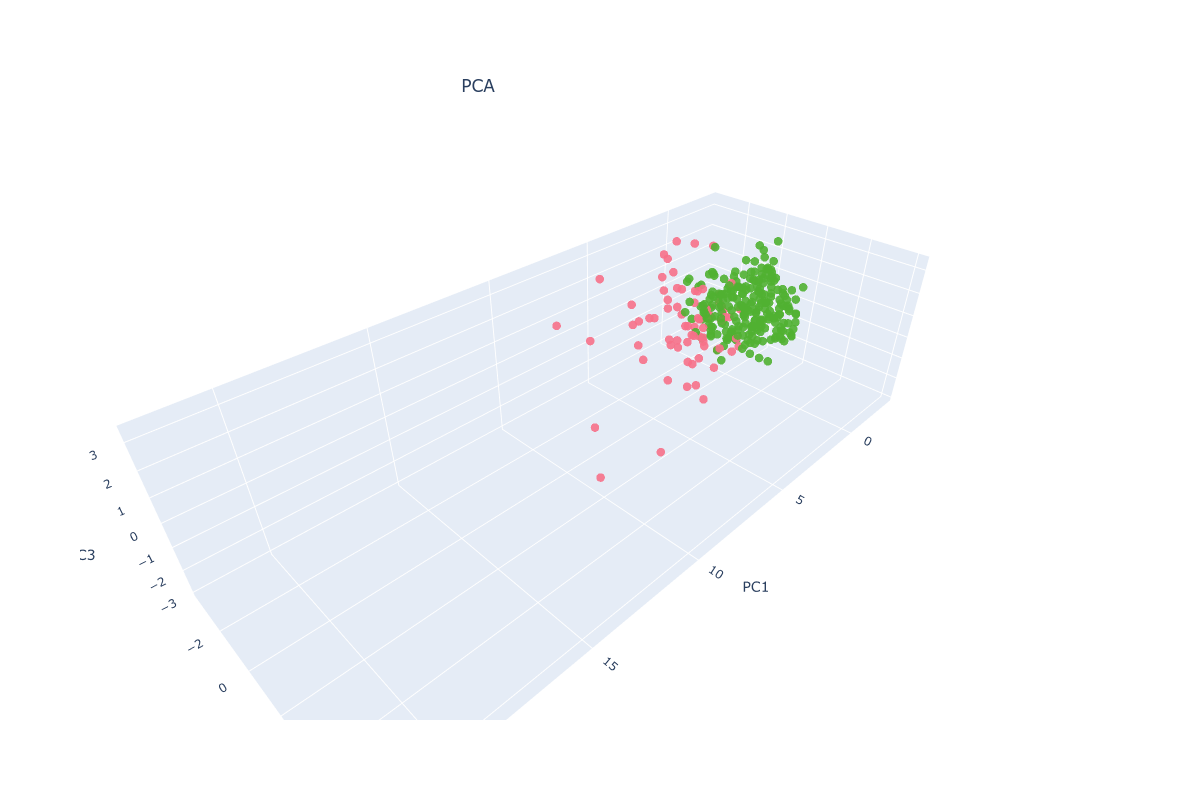

In [171]:
PCA_visualization(cl_df, labels=kmlabels)

It is not doing too bad with K=3 with classifying outliers - as a human would also probably group them together if they where told to assign all observations to  3 groups - but when dividing the sample into N clusters gets more complicated for the bulk of the distribution. 

##### The most extreme outliers
(very short analysis to compare the most extreme observation with the average feature value)

There are two users who are extremely different than the others, and take up as much as one whole cluster due to their distance.

In [172]:
user = df[xdata > 11].iloc[0,:] #the most extreme observation in PCA1
other_user = df[xdata > 11].iloc[1,:]     #the most extreme observation in PCA1

The index matches the ID of the user. The user's ID is:  t43-user19

Features by which user t43-user19 is above average: (mean of the feature < value of the user)
	    σ        x̄
level:     1.12    1.68 <   9.00
__________
	    σ        x̄
exp:       47.39   48.87 <  566.00
__________
	    σ        x̄
rocket:    0.29    0.09 <   1.00
__________
	    σ        x̄
glider:    0.20    0.04 <   1.00
__________
	    σ        x̄
friends:   1.16    0.83 <   2.00
__________
	    σ        x̄
likes:     194.99  124.34 <  2449.00
__________
	    σ        x̄
GameTime:  370.94  943.23 <  1316.48
__________
	    σ        x̄
edGraffiti:6.10    7.46 <   17.00
__________
	    σ        x̄
edGraffiti:3.74    5.03 <   16.00
__________
	    σ        x̄
dDialogues:14.17   9.35 <   129.00
__________


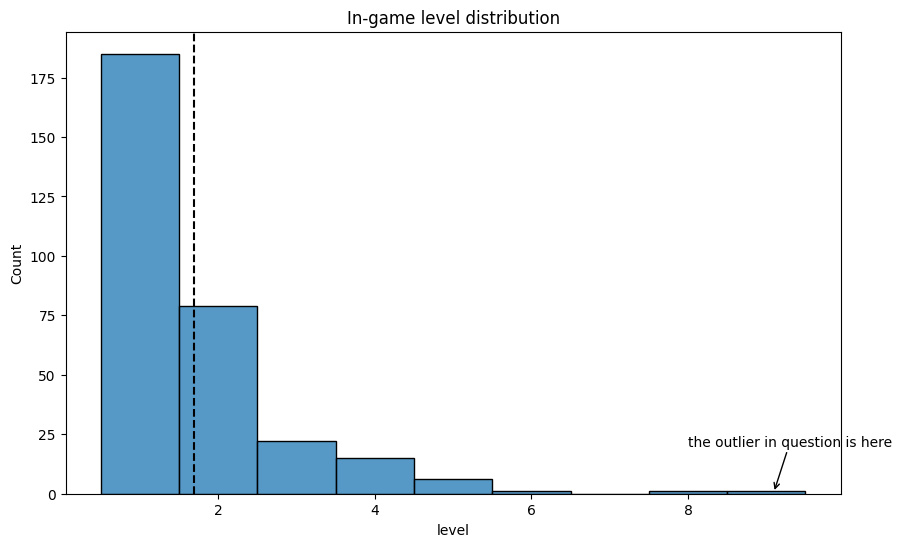

Average GameTime: 15 minutes and 43 seconds (black line)
The outlier's GameTime: 21 minutes and 56 seconds


In [173]:
to_print = user

print('The index matches the ID of the user. The user\'s ID is: ', to_print.UserID)
print()

above_average(df, to_print)    
to_display = 'level' #change this variable if you want to see other distributions
g = df
plt.figure(figsize=(10, 6))

sns.histplot(data=g, x=to_display, discrete=True if to_display!='GameTime' else False) 
plt.title(f'In-game {to_display} distribution')

plt.axvline(g[to_display].mean(), color='black', linestyle='--')

plt.annotate(
    'the outlier in question is here',  
    xy=(to_print[to_display]+0.1, 1),
    xytext=(to_print[to_display]-1, 20 if to_display!='GameTime' else 1.5),
    arrowprops=dict(facecolor='black', arrowstyle='->', shrinkA=0.5, shrinkB=1)
)

plt.savefig('Graphs/The_outliers_here')
plt.show()
T = (df.GameTime)
print(f'Average GameTime: {int(T.mean()//60)} minutes and {round(T.mean()%60)} seconds (black line)')
print(f'The outlier\'s GameTime: {int(to_print.GameTime//60)} minutes and {round((to_print.GameTime)%60)} seconds')

The index matches the ID of the user. The user's ID is:  t43-user3

Features by which user t43-user3 is above average: (mean of the feature < value of the user)
	    σ        x̄
level:     1.12    1.68 <   8.00
__________
	    σ        x̄
likes:     194.99  124.34 <  1380.00
__________
	    σ        x̄
GameTime:  370.94  943.23 <  1103.33
__________
	    σ        x̄
edGraffiti:6.10    7.46 <   20.00
__________
	    σ        x̄
edGraffiti:3.74    5.03 <   7.00
__________
	    σ        x̄
ffiti_avgt:0.69    0.77 <   0.82
__________
	    σ        x̄
dDialogues:14.17   9.35 <   83.00
__________


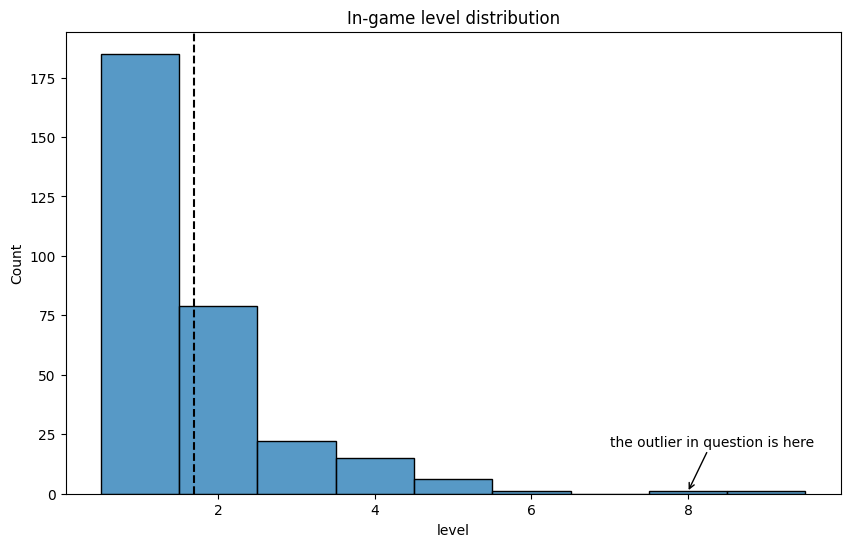

Average GameTime: 15 minutes and 43 seconds (black line)
The outlier's GameTime: 18 minutes and 23 seconds


In [174]:
to_print = other_user

print('The index matches the ID of the user. The user\'s ID is: ', to_print.UserID)
print()

above_average(df, to_print)    
to_display = 'level'  #change this variable if you want to see other distributions
g = df
plt.figure(figsize=(10, 6))

sns.histplot(data=g, x=to_display, discrete=True if to_display!='GameTime' else False) 
plt.title(f'In-game {to_display} distribution')

plt.axvline(g[to_display].mean(), color='black', linestyle='--')

plt.annotate(
    'the outlier in question is here',  
    xy=(to_print[to_display], 1),
    xytext=(to_print[to_display]-1, 20 if to_display!='GameTime' else 1.5),
    arrowprops=dict(facecolor='black', arrowstyle='->', shrinkA=0.5, shrinkB=1)
)

plt.savefig('Graphs/The_outliers_here')
plt.show()
T = (df.GameTime)
print(f'Average GameTime: {int(T.mean()//60)} minutes and {round(T.mean()%60)} seconds (black line)')
print(f'The outlier\'s GameTime: {int(to_print.GameTime//60)} minutes and {round((to_print.GameTime)%60)} seconds')

In [175]:
# The outliers can be removed with the following code.
outliers = user.UserID, other_user.UserID
no_outliers = cl_df[~df.UserID.isin(outliers)]       # removing outliers from clustering dataframe;
no_outliers = df[df.index.isin(cl_df.index)]          # removing outliers from the general (unscaled) dataframe 
no_outliers.to_csv('CleanData/HSS_no_outliers.csv', sep=';')
print(cl_df.shape[0])

310


Now you can visualize what will happen in the next section (Optimizing cluster silhouette...): for each iteration, a combination of parameters is used to find which K yields the highest silhouette score. 
In the following graphs you can only see a reduced version of the whole tuning, because there are more parameters than just k.

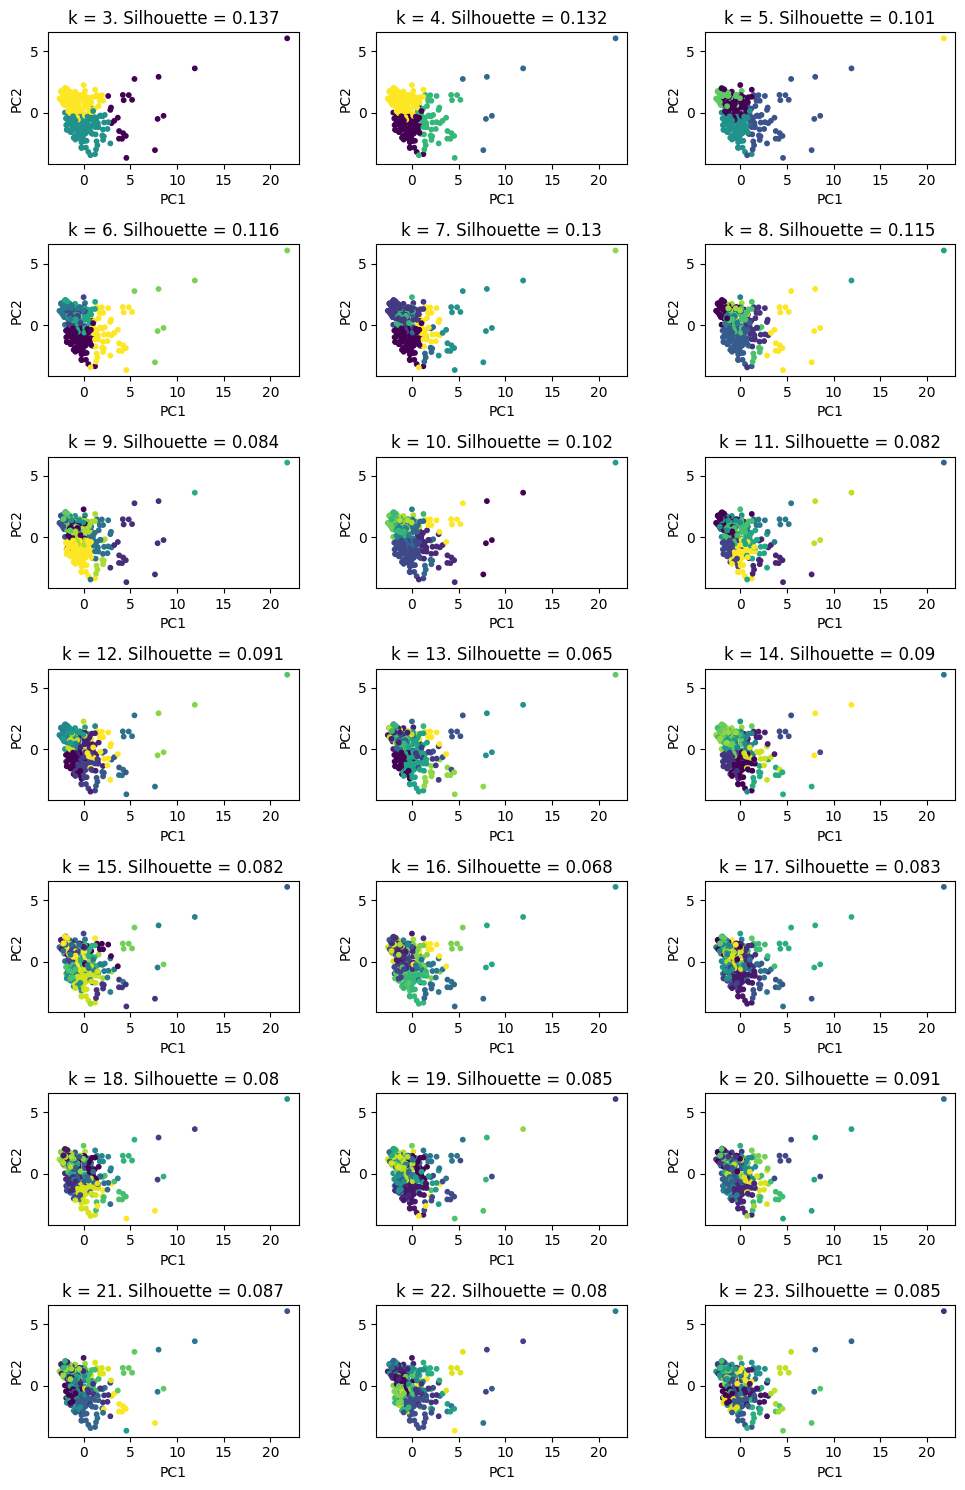

In [176]:
df = pd.read_csv('CleanData/HSS_kmeans.csv', sep=';')[cols + categorical]    
cl_df  = preprocess_data(df)

visualize_k_tuning(cl_df, 3,24)

The silhouette, as shown above, is usually highest when K=3. This unfortunately does not help any further inspection: most of the observations fall inside of one of two clusters, and there is likely too much variance inside each of those clusters to use them for describing students - in other words, I expect only 3 clusters to be too generic. Would it make sense for 310 people to be considered either one kind of player or the other? Only in a context of extreme simplicity, but this research can take it a little further. 

### Optimizing cluster silhouette, cluster analysis, visualization and associations


In [177]:
from kMeans import kMtune

In [178]:
cl_df.columns

Index(['level', 'exp', 'rocket', 'glider', 'friends', 'likes', 'GameTime',
       'NumberOfAnnotatedGraffiti', 'totalAnnotatedGraffiti', 'Graffiti_avgt',
       'NumberOfDialoguesActivated', 'totalAnnotatedDialogues',
       'Dialogue_avgt', 'Age', 'Gender', 'Education', 'General engagement',
       'GenderEnvironment'],
      dtype='object')

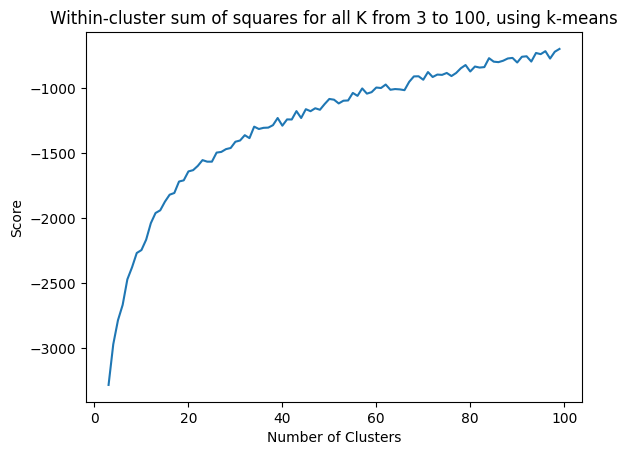

In [179]:
num_clusters = 100
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(3, num_clusters)]
score = [kmeans_tests[i].fit(cl_df).score(cl_df) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(3, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Within-cluster sum of squares for all K from 3 to 100, using k-means')
plt.show()

Using the elbow method, the amount of clusters could be between 16 and 25.

In [180]:
model = kMtune()
#forcing the model to look for more than just 3 clusters
results = model.fit_and_evaluate(minK=16, maxK=25, p='CleanData/HSS_kmeans.csv', #full data, outliers included with the goal of them being clustered as well.
                                 rs = 20, v=0, metr='euclidean', alg='lloyd')
results[0]

100%|███████████████████████████████████████████| 20/20 [00:14<00:00,  1.38it/s]


{'K': 23,
 'Random state': 3,
 'silhouette': 0.1575522851091475,
 'sizes': array([ 8,  1, 26,  7,  4, 27,  7, 31, 41,  1,  4,  2, 19, 19, 19,  3,  8,
        12, 16, 26, 26,  2,  1])}

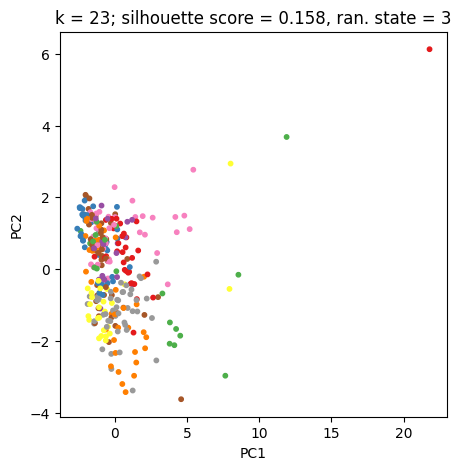

In [181]:
kmeans = KMeans(results[0]['K'], random_state=results[0]['Random state'],  max_iter=400, algorithm='lloyd')
kmlabels = kmeans.fit_predict(cl_df)

g = cl_df[cols + categorical]

fig, axs = plt.subplots(1, 1, figsize=(5, 5)) 

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(g)
reduced_g = pd.DataFrame(reduced_features, index=g.index, columns=['PC1','PC2'])
reduced_g['cluster'] = kmlabels

xdata.loc[:,] = reduced_g['PC1']
ydata.loc[:,] = reduced_g['PC2']

scatter = axs.scatter(xdata, ydata, c=reduced_g['cluster'], cmap='Set1', s=10, alpha=1)    
axs.set_xlabel('PC1')
axs.set_ylabel('PC2')
axs.set_title(f'k = {results[0]['K']}; silhouette score = {results[0]['silhouette']:.3f}, ran. state = {results[0]['Random state']}')
plt.show()

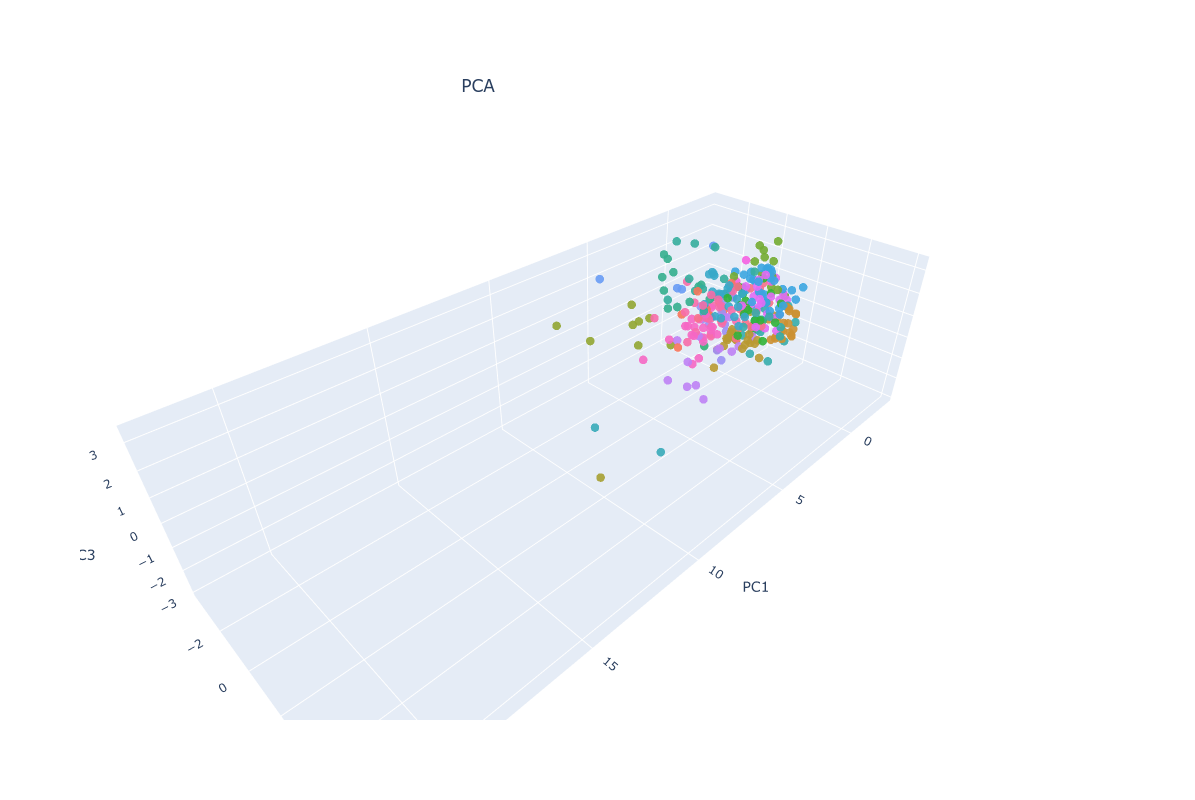

In [182]:
PCA_visualization(g, kmlabels)

PCA assumes linearity and its representation attempts to preserve as much of the variance as in the original space - which can be the best case for some variables, for example relationships between "likes" and "level" (due to in-game mechanics, one provides the other - for proof, plot ```sns.pairplot(cl_df[cols]```), but for most of the variables there is probably not a clear linear association. In a linearly lower dimensional manifold there isn't a clear separation of the clusters.

Another assumption that should affect the visualization of the clusters is not only PCA, but K-means itself: it is an algorithm that assumes spherically-shaped clusters in any feature space, and many observations appear to not be placed spherically clustered in space. The silhouette score, which ranges {$-1; 1$} is computed in the full feature space, has often a value far from 0.5 which is often a threshold to indicate well separated clusters, and has often a value close to 0, which indicates overlapping. In a separate attempt, different metrics (cosine, manhattan) for distance were used but would yield not better different results.

I will now attempt with other clustering methods, but we can also visualize the result of k-means with t-SNE which is often used because of its ability to preserve local structures in the data rather than the feature variance (so keep in mind that the distance is not linearly representative of the original space).

In [17]:
# sns.pairplot(cl_df[cols])
# plt.show()

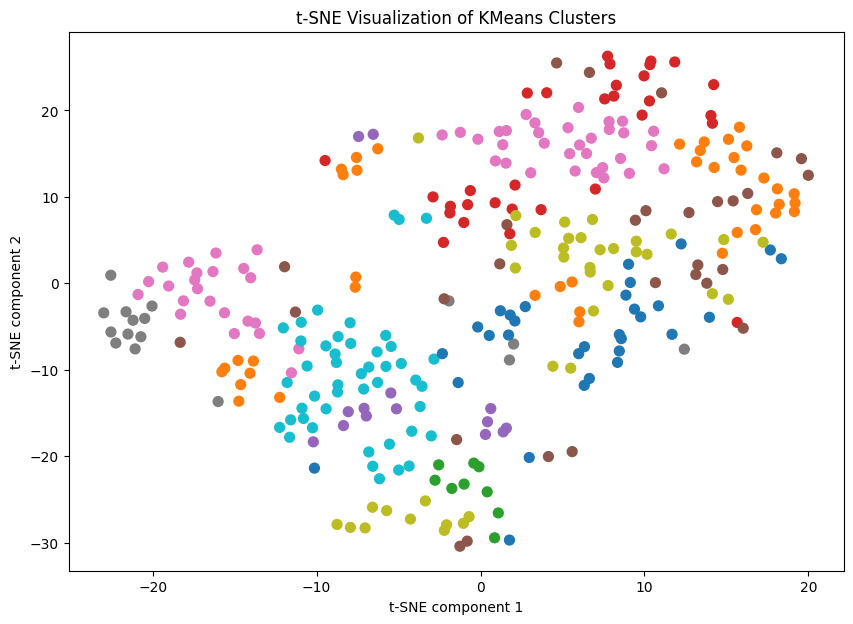

In [187]:
tsne = TSNE(n_components=2, random_state=25, method='exact', init='pca', learning_rate='auto', angle=1)
tsne_results = tsne.fit_transform(cl_df)
g = pd.DataFrame()
g['tsne-2d-one'] = tsne_results[:, 0]
g['tsne-2d-two'] = tsne_results[:, 1]

plt.figure(figsize=(10, 7))
scatter = plt.scatter(g['tsne-2d-one'], g['tsne-2d-two'], c=kmlabels, cmap='tab10', s=50)
plt.title('t-SNE Visualization of KMeans Clusters')

plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')

plt.show()

## DBSCAN and HDBSCAN
Clustering in this case is different: it's density based and does not require an assumption over K, as its whole purpose is to use it to determine how many cluster there could be in the data based on density agglomerates. More information can be found in the extensive literature. For tuning I referred to [HDBSCAN parameter's selection](https://hdbscan.readthedocs.io/en/latest/parameter_selection.html).

In [188]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [189]:
df = pd.read_csv('CleanData/HSS_kmeans.csv', sep=';')[cols + categorical]    
cl_df  = preprocess_data(df)

X1 = cl_df
X1.columns

Index(['level', 'exp', 'rocket', 'glider', 'friends', 'likes', 'GameTime',
       'NumberOfAnnotatedGraffiti', 'totalAnnotatedGraffiti', 'Graffiti_avgt',
       'NumberOfDialoguesActivated', 'totalAnnotatedDialogues',
       'Dialogue_avgt', 'Age', 'Gender', 'Education', 'General engagement',
       'GenderEnvironment'],
      dtype='object')

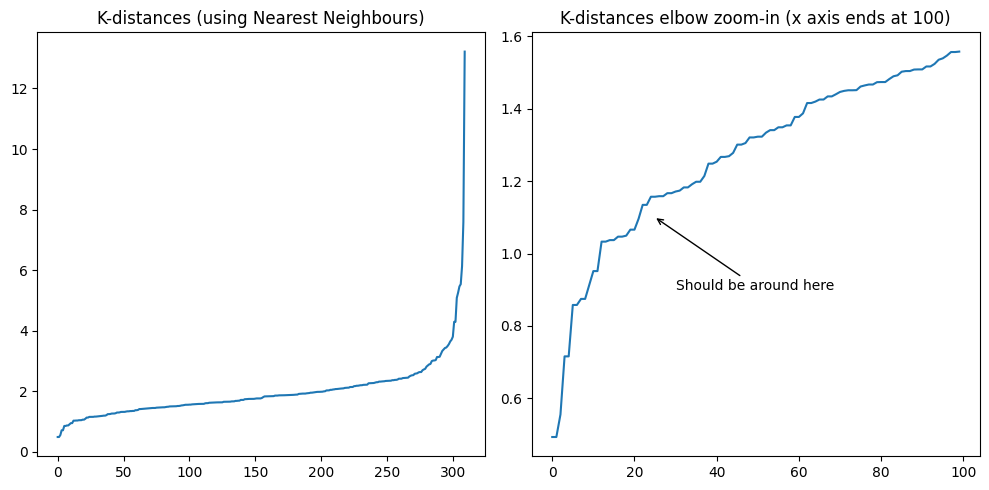

In [190]:
# minPts = minimum number of nearest samples for a point to be considered a core point: 
# it is recommended as equal or bigger to the number of dimensions in the data plus one. Changing the MinPts does not change the k-distances plot.
MinPts = len(cols + categorical) + 1
# epsilon = the maximum distance between two samples for one to be considered as in the neighborhood of the other:
# it should be found using a k-distance plot. This part is based on Tara Mullin's work. 
neighbors = NearestNeighbors(n_neighbors=MinPts) #I set it MinPts
neighbors_fit = neighbors.fit(X1)
distances, indices = neighbors_fit.kneighbors(X1)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

#now just plotting k-distance
fig, axs = plt.subplots(1, 2, figsize=(10, 5)) 
axs[0].plot(distances)
axs[0].set_title('K-distances (using Nearest Neighbours)')

startingdistance = 100
axs[1].plot(distances[:startingdistance])
axs[1].set_title(f'K-distances elbow zoom-in (x axis ends at {startingdistance})')
max_slope_change_location = find_max_slope_change_location(distances[:200])  


axs[1].annotate(
    'Should be around here',  
    xy=(25, 1.1),
    xytext=(30, 0.9),
    arrowprops=dict(facecolor='black', arrowstyle='->', shrinkA=0.5, shrinkB=1)
)

plt.tight_layout()
plt.savefig(f'Graphs/kmeans_separate_analysis.png', dpi=500)
plt.show()

In [191]:
e_l = np.arange(0.01, 3, 0.01).tolist()  
m_l = np.arange(3, 30, 1).tolist()  

best = dict()
metric = 'euclidean'

for i in tqdm(e_l):
    for j in m_l:
        dbscan = DBSCAN(eps=i, min_samples=j, metric=metric)
        labels = dbscan.fit_predict(X1)
        g0 = pd.DataFrame(labels)
        
        N = g0.shape[0] 
        unassigned = g0[0].value_counts().tolist()[0]
        
        variety = g0.value_counts().shape[0]
        
        loss = (unassigned) - (variety)  

        
        #    Loss is simply defined as the amount of unlabelled observations (scaled with sample size) 
        # divided by the amount of cluster (penalizing not diversified outputs) 
        
        #    It is so in an attempt to make not all observations fall in one cluster. 
        
        best[loss] = [i,j, g0.value_counts().shape[0], unassigned]

        
epsilon = best[min(best.keys())][0]   
MinPts = best[min(best.keys())][1]

print(f'epsilon = {epsilon:.2f}; Minpts = {MinPts}.')


100%|█████████████████████████████████████████| 299/299 [00:27<00:00, 10.76it/s]

epsilon = 1.88; Minpts = 3.


<Axes: xlabel='epsilon', ylabel='Loss'>

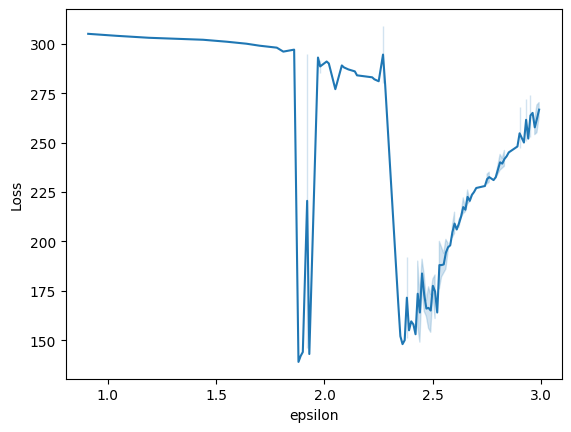

In [192]:
res = pd.DataFrame({'Loss':best.keys(), 'epsilon': [best[e][0] for e in best.keys()], 
                    'minpts': [best[e][1] for e in best.keys()], 'nc': [best[e][2] for e in best.keys()],
                   'unassigned': [best[e][3] for e in best.keys()]})
sns.lineplot(y=res.Loss, x=res.epsilon)

This loss function is not fit for this problem, but in this attempt it's penalizing _epsilons_ that leave observations unlabelled and valorizes _epsilons_ that assign observations to a variety of clusters. 

Now that I gathered some data regarding the range of possible clusters, I will standardize the "cluster variety" term and the unassigned observations term so that we can start to compare the two terms in the loss, and we don't only aim for the most spread cluster distribution, favoring something closer to what DBSCAN usually finds.

<Axes: ylabel='nc'>

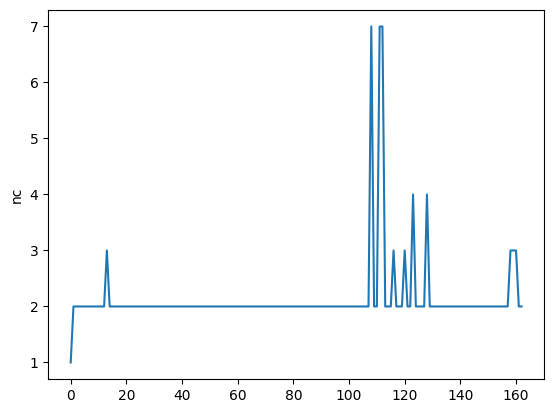

In [193]:
sns.lineplot(res.nc)

In [194]:
for i in tqdm(e_l):
    for j in m_l:
        dbscan = DBSCAN(eps=i, min_samples=j, metric=metric)
        labels = dbscan.fit_predict(X1)
        g0 = pd.DataFrame(labels)
        if i == 1.61:
            continue
        N = g0.shape[0] 
        unassigned = g0[0].value_counts().tolist()[0]
        std_unassigned = res.unassigned.std()
        variety = g0.value_counts().shape[0]
        std_variety = res.nc.std()
        #normalized version
        loss = unassigned - (variety / std_variety)
        
        #    Loss is simply defined as the amount of unlabelled observations
        # divided by the amount of cluster (penalizing not diversified outputs) 
        
        #    It is so in an attempt to make not all observations fall in one cluster. 
        
        best[loss] = [i,j, g0.value_counts().shape[0], unassigned]

        
epsilon = best[min(best.keys())][0]   
MinPts = best[min(best.keys())][1]

print(f'epsilon = {epsilon:.2f}; Minpts = {MinPts}.')


100%|█████████████████████████████████████████| 299/299 [00:29<00:00, 10.18it/s]

epsilon = 1.88; Minpts = 3.


<Axes: xlabel='epsilon', ylabel='Loss'>

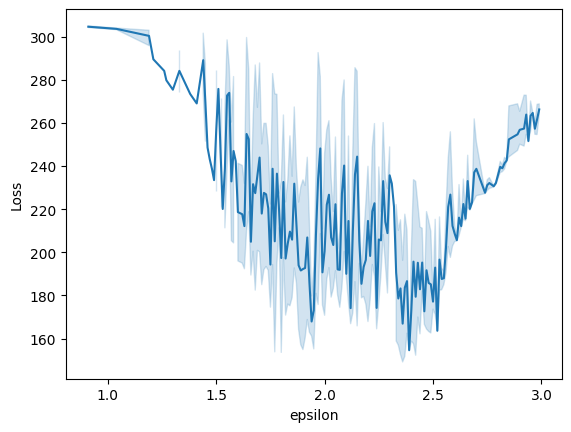

In [195]:
res = pd.DataFrame({'Loss':best.keys(), 'epsilon': [best[e][0] for e in best.keys()], 
                    'minpts': [best[e][1] for e in best.keys()], 'nc': [best[e][2] for e in best.keys()], 
                    'unassigned': [best[e][3] for e in best.keys()]})
sns.lineplot(y=res.Loss, x=res.epsilon)

<Axes: ylabel='nc'>

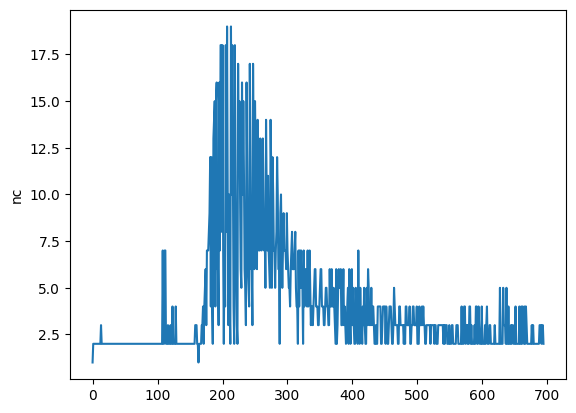

In [196]:
sns.lineplot(res.nc)

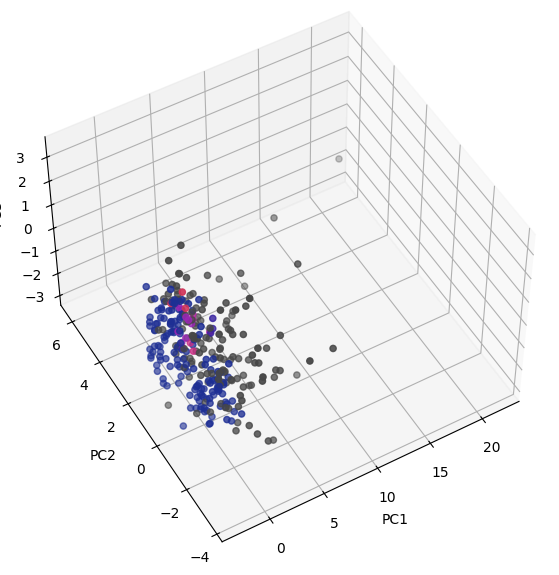

In [197]:
dbscan = DBSCAN(eps=epsilon, min_samples=MinPts, metric=metric)

labels = dbscan.fit_predict(X1)
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(X1)

reduced_g = pd.DataFrame(reduced_features, index=X1.index, columns=['PC1','PC2', 'PC3'])


dark_grey = '#474747'  #for disconnected observations, labelled -1.
colors = list(Color('#1e2f94').range_to(Color("#d13459"), len(set(labels))))
colors = [str(color) for color in colors]
cmap_custom = ListedColormap(['#474747'] + colors)

fig = plt.figure(figsize=(25, 7))
ax = fig.add_subplot(111, projection='3d')

xdata = reduced_g['PC1']
ydata = reduced_g['PC2']
zdata = reduced_g['PC3']

scatter = ax.scatter(xdata, ydata, zdata, c=labels, cmap=cmap_custom)

ax.view_init(elev=50, azim=240)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3', rotation = 90)

plt.show()

It seems that most observations (in dark grey) still went labelled as not belonging to any cluster. 

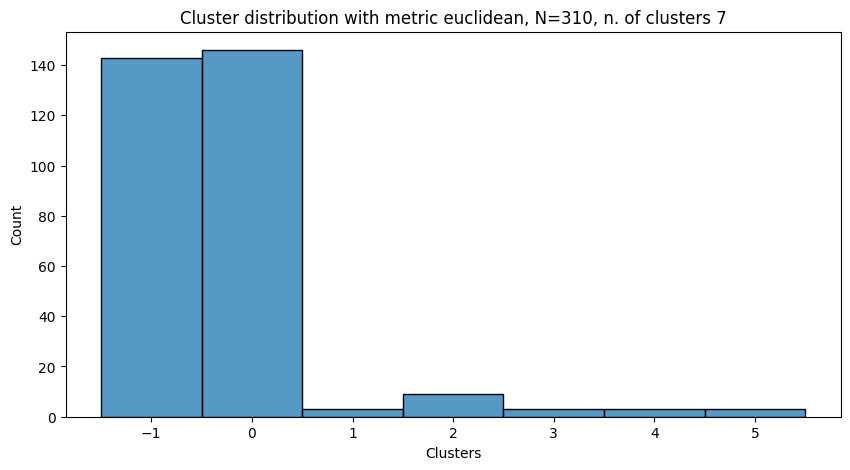

In [198]:
fig = plt.figure(figsize=(10, 5))

sns.histplot([int(f) for f in labels], discrete=True)

plt.title(f"Cluster distribution with metric {metric}, N={X1.shape[0]:,}, n. of clusters {len(set(labels))}")
plt.ylabel('Count')
plt.xlabel('Clusters')

# plt.savefig(f'Graphs/Cluster_distribution_hp_{epsilon}{MinPts}.png', dpi=500)
plt.show()

We now try its more recent version of DBSCAN, which requires less tuning.

In [199]:
import hdbscan
from sklearn.manifold import TSNE

In [200]:
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
                            gen_min_span_tree=False, leaf_size=40,
                            metric='manhattan', min_cluster_size=5, min_samples=MinPts, p=None)
labels = clusterer.fit_predict(X1)

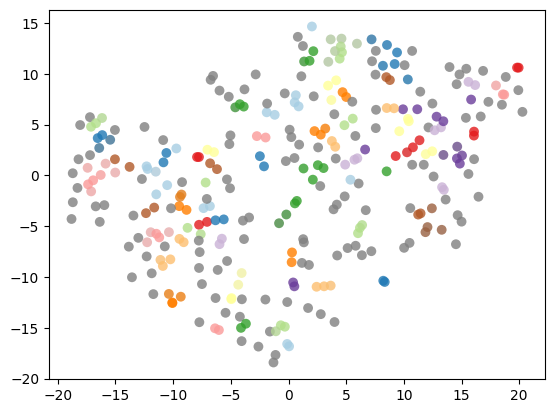

In [201]:
random.seed(25)
np.random.seed(25)
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=2, 
    min_samples=1,
    cluster_selection_epsilon = 10/316,
    cluster_selection_method='leaf',
).fit(X1)

color_palette = sns.color_palette('Paired', 100)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]

cluster_member_colors = [sns.desaturate(x, p) for x, p in
   zip(cluster_colors, clusterer.probabilities_)]
projection = TSNE().fit_transform(X1)

plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.8)

<Axes: >

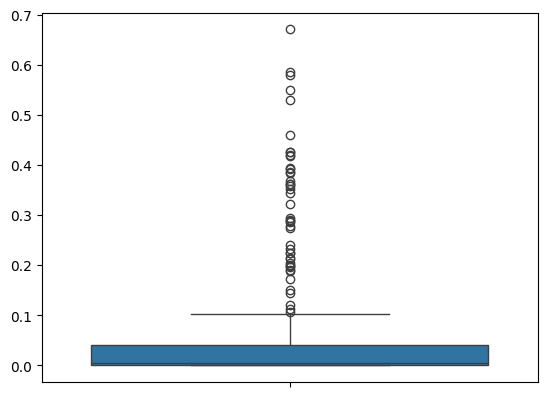

In [202]:
sns.boxplot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)])

The amount of outliers can be determined based on HDBSCAN scores for outliers. Below you can find the proportion of outliers. The outliers are identified on the basis of the boxplot above, which means any observation above 0.1 given the distribution of the outlier score.

In [203]:
print(round(clusterer.outlier_scores_[clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)]>0.1].shape[0]/clusterer.outlier_scores_.shape[0], 3), '%')

0.152 %


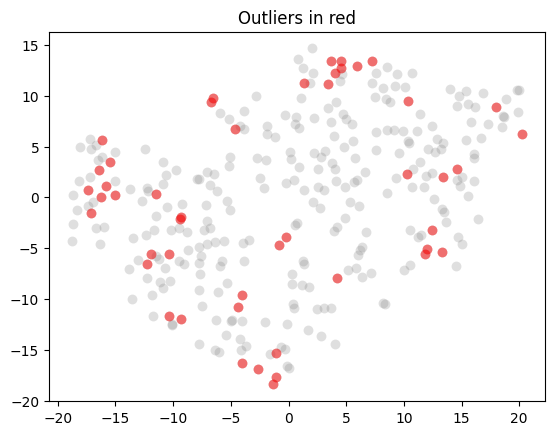

In [210]:
threshold = pd.Series(clusterer.outlier_scores_).quantile(1-0.152)
outliers = np.where(clusterer.outlier_scores_ > threshold)[0]
plt.scatter(*projection.T, s=50, linewidth=0, c='gray', alpha=0.25)
plt.scatter(*projection[outliers].T, s=50, linewidth=0, c='red', alpha=0.5)
plt.title('Outliers in red')
plt.show()

In [206]:
pd.Series(labels).value_counts()/len(labels)

-1    0.816129
 6    0.051613
 1    0.032258
 2    0.025806
 0    0.019355
 4    0.019355
 3    0.019355
 5    0.016129
Name: count, dtype: float64

There are many outliers as identified by HDBSCAN (15.2%) and even more unidentified observations (81.6%). This problem cannot be easily solved with DBSCAN.

## SPECTRAL CLUSTERING

In [207]:
from sklearn.cluster import SpectralClustering
from matplotlib import colormaps

In [264]:
X1 = pd.read_csv('CleanData/HSS_no_outliers.csv', sep=';')[cols + categorical]
X1 = preprocess_data(X1)

We can get a hint of how the different methods work for computing the affinity matrix (which produces several differences in the clustering) by plotting side by side **two features**.

<Axes: xlabel='Graffiti_avgt', ylabel='Dialogue_avgt'>

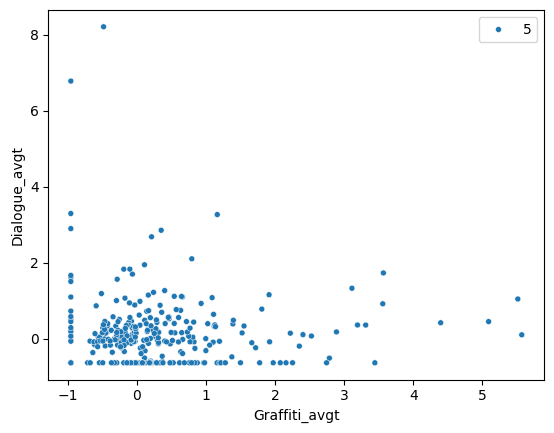

In [265]:
# sns.pairplot(X1[['NumberOfAnnotatedGraffiti', 'GameTime', 'Graffiti_avgt', 'NumberOfDialoguesActivated', 'Dialogue_avgt', 'likes']], size=5)
sns.scatterplot(y=X1.Dialogue_avgt, x=X1.Graffiti_avgt, size=5)

In the graph above, displaying _scaled_ variables, a human could probably start with saying that there are several areas: the ones who never spent time on graffiti (the vertical line above graffiti_avgt = -1), the ones who never spent time on dialogues (the horizontal line below dialogue_avgt), and the ones who spent some time in both, that require more attention, but could still be divided furthermore into people who erased more graffiti than changing dialogue, and viceversa. And why not, a human could also recognize that there are some outliers too. At least 5.

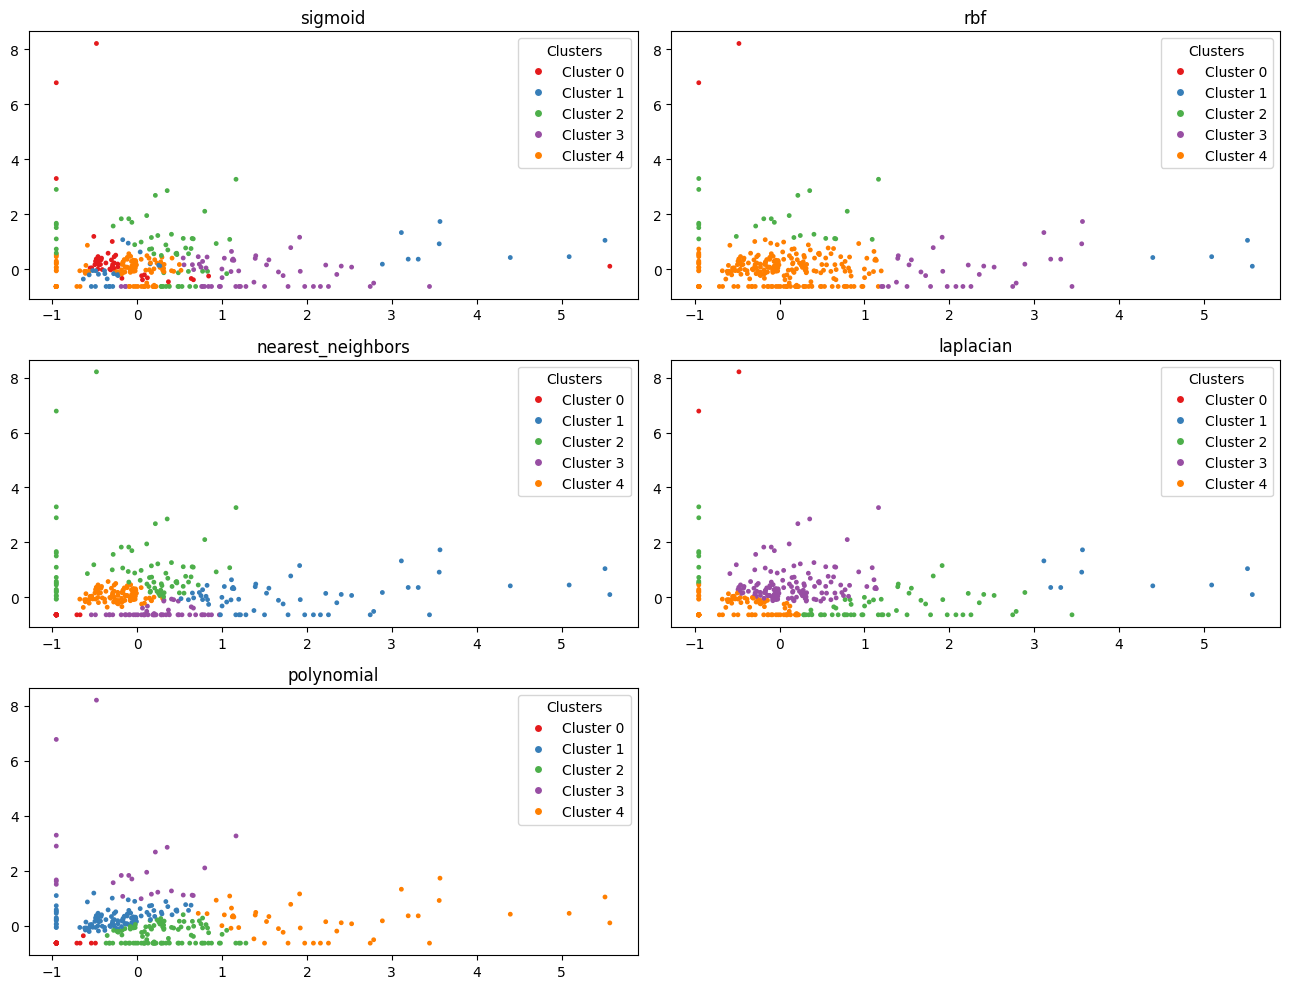

In [266]:
K = 5

methods = ['sigmoid', 'rbf','nearest_neighbors', 'laplacian', 'polynomial'] 

#there are more methods, but some do not work on this data without some further modifications that I have decided to avoid.

fig, axs = plt.subplots(3, 2, figsize=(13, 10))

for ax, method in zip(axs.flatten(), methods):
    g = X1[['Graffiti_avgt', 'Dialogue_avgt']]
    spectralclustering = SpectralClustering(n_clusters=K,
                                            assign_labels='cluster_qr',
                                            affinity=method,
                                            random_state=25).fit_predict(g)
    
    color_palette = sns.color_palette('Set1', K)
    cluster_colors = [color_palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in spectralclustering]
    
    ax.set_title(method)
    scatter = ax.scatter(g.Graffiti_avgt, g.Dialogue_avgt, c=cluster_colors, s=6)
    
    # Create a legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_palette[i], markersize=6, label=f'Cluster {i}') for i in range(K)]
    ax.legend(handles=handles, title='Clusters')
axs.flatten()[-1].axis('off')
plt.tight_layout()
plt.show()

Not all variables's distribution behave like Graffiti_avgt or Dialogue_avgt, but since these two are some of the most important variables in describing the behaviour, we may rather have these two under the focus of the clustering choices.

Laplacian affinity matrix is often the method chosen for reasonability of clustering choices, but in this case it seems to be grouping observations based on the wrong meaning of behaviour (notice how many the users who only did graffiti + users only did dialogues are in the same cluster). 
NN generally performs well, but too many users are clustered in #2, and the variance within cluster #1 seems to high. 
RBF also performed nicely, but probably too simplistic (most observations are in 1 cluster)

Polynomial is the choice for this research as it seems to make less mistakes than others.

Now, onto the whole data. Research on spectral clustering indicates that to estimate the parameter C (amount of clusters) one could use 1) the multiplicity of eigenvalue 1 as it is equal to the number of groups, but only in clearly separated groups and as little noise as possible or 2) the algorithm that Zelnik-manor and Perona in 2014 have developed to estimate C. First we will use the first method; later we will use the second method with Expectation-Maximization, Analytical Gradient Descent and as set as a constraint that C can only take values between 4 and 30 (to improve interpretability of results, as 3 clusters is simply not enough).

##### Method 1

Optimal number of clusters [ 1  2  9 19 34]


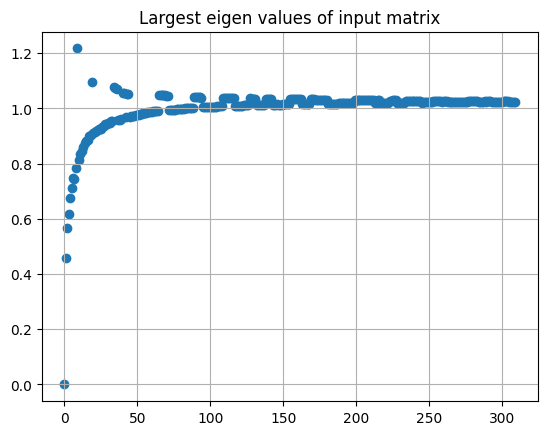

In [267]:
affinity_matrix = getAffinityMatrix(X1, k = 9)   #This code was provided by git user Ciortan Madalina (ciortanmadalina) based on a paper named "A Tutorial on Spectral Clustering" by Ulrike von Luxburg published in 2007
k, _,  _ = eigenDecomposition(affinity_matrix)
k.sort()
print(f'Optimal number of clusters {k}')

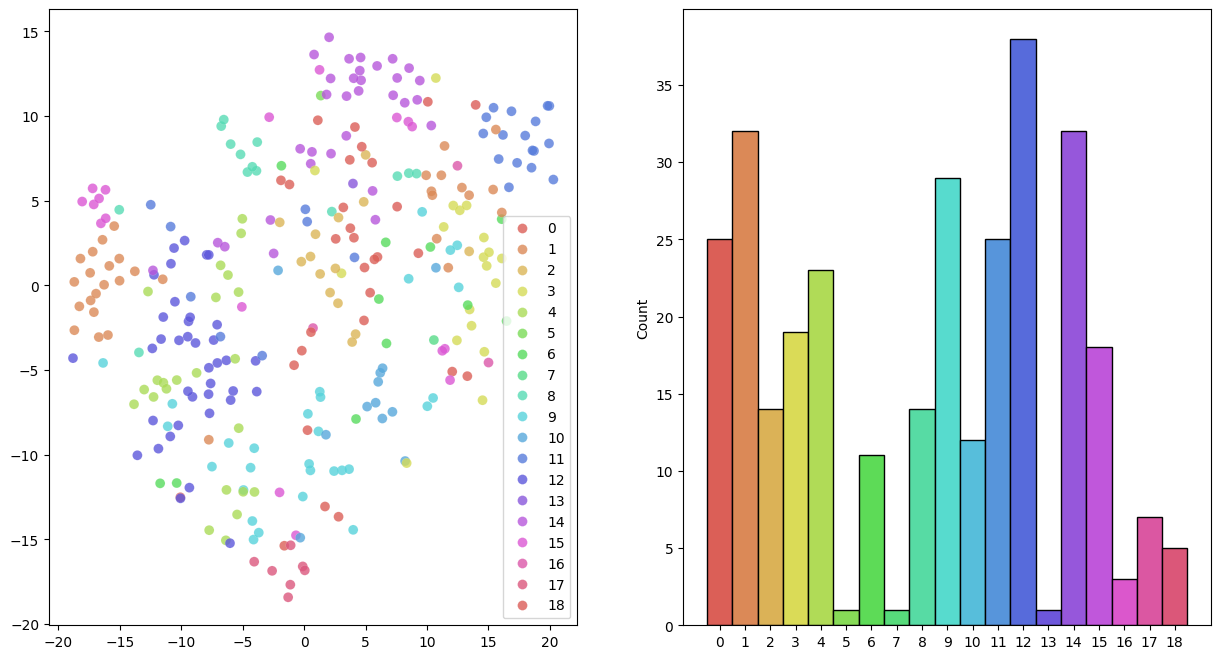

In [268]:
K = 19
spectralclustering = SpectralClustering(n_clusters=K,
                                        assign_labels='discretize',
                                        affinity='polynomial',
                                       ).fit_predict(X1) 

fig, axs =  plt.subplots(1,2, figsize=(15, 8)) 
projection = TSNE(random_state=25).fit_transform(X1)
color_palette = sns.color_palette('hls', K)

sns.scatterplot(x=projection[:, 0], y=projection[:, 1], 
                s=50, linewidth=0.1, hue=spectralclustering, 
                palette=sns.color_palette('hls', as_cmap=True), 
                alpha=0.8, ax=axs[0], legend='full')
sns.histplot(data=spectralclustering, ax=axs[1], bins=K, discrete=True, element='bars')
for patch, color in zip(axs[1].patches, color_palette):
    patch.set_facecolor(color)
axs[1].set_xticks([i for i in range (K)])
plt.savefig(f'Graphs/SpectralClustering_k_{K}_TSNE.png', dpi=500)
plt.show()

Below an interactive plot (you can zoom into it), to zoom in if needed.

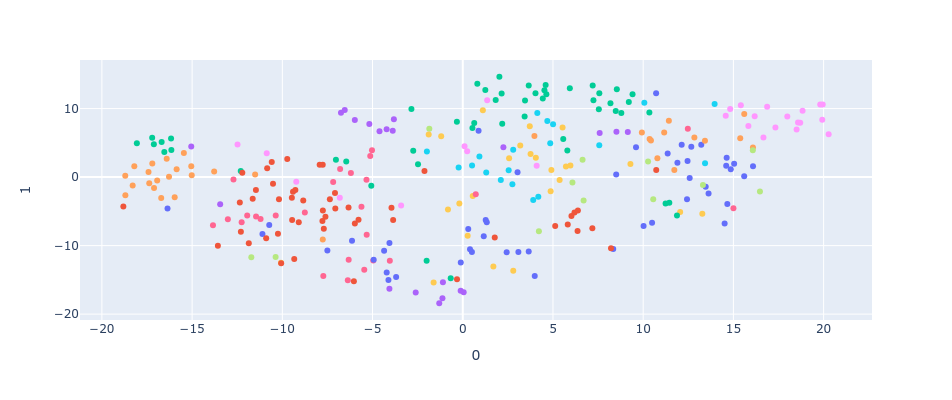

In [269]:
import plotly.express as px

tsne = TSNE(n_components=2, random_state=25)
projections = tsne.fit_transform(X1)

fig = px.scatter(
    projections, x=0, y=1,# z=2,
    width=800, height=400, labels=set(spectralclustering),
    color=[color_palette[x] for x in spectralclustering]
)
fig.update_traces(marker_size=6)
fig.update_layout(showlegend=False)

fig.show()

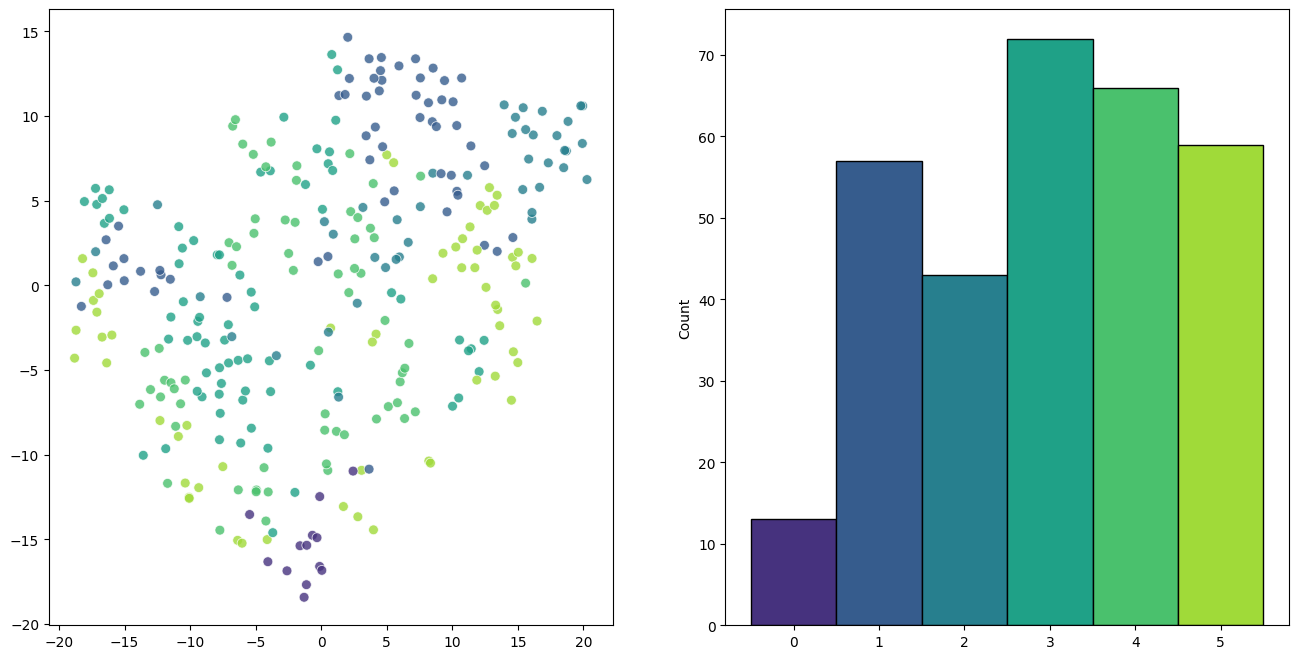

In [270]:
K = 6
affinity_matrix = getAffinityMatrix(X1, k = 9)


spectralclustering = SpectralClustering(n_clusters=K,
                                        assign_labels='discretize',
                                        affinity='polynomial'
                                       ).fit_predict(X1)

fig, axs =  plt.subplots(1,2, figsize=(16, 8)) 
projection = TSNE(random_state=25).fit_transform(X1)
color_palette = sns.color_palette('viridis', K)

sns.scatterplot(x=projection[:, 0], y=projection[:, 1], 
                s=50, linewidth=0.6, 
                color=[color_palette[x] for x in spectralclustering], 
                alpha=0.8, ax=axs[0], legend='full')
sns.histplot(data=spectralclustering, ax=axs[1], bins=K, discrete=True, element='bars')
for patch, color in zip(axs[1].patches, color_palette):
    patch.set_facecolor(color)
axs[1].set_xticks([i for i in range (K)])
plt.savefig(f'Graphs/SpectralClustering_k_{K}_TSNE.png', dpi=500)
plt.show()

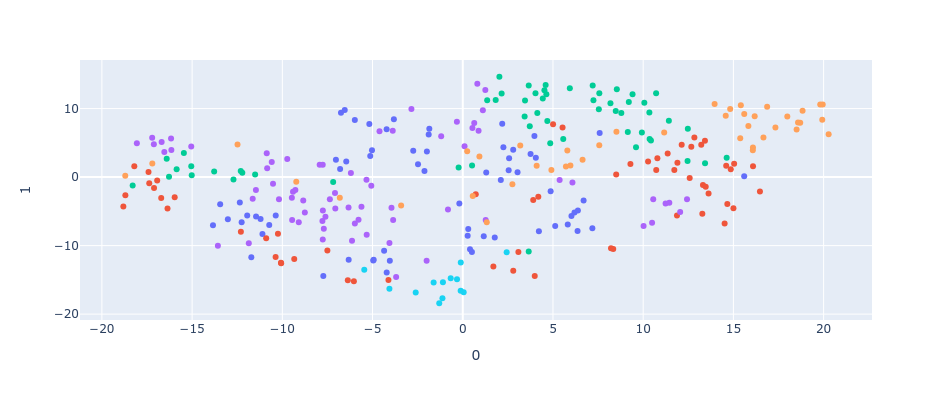

In [271]:
import plotly.express as px

tsne = TSNE(n_components=2, random_state=25)
projections = tsne.fit_transform(X1)
color_palette = sns.color_palette('husl', K)
fig = px.scatter(
    projections, x=0, y=1,# z=2
    width=800, height=400, labels=set(spectralclustering),
    color=[color_palette[x] for x in spectralclustering]
)
fig.update_traces(marker_size=6)
fig.update_layout(showlegend=False)

fig.show()

##### Method 2. Caution: to reproduce results, you need to use `scluster-master`

In order to find the optimal results for spectral clustering I will use a python version of self-tuning spectral clustering algorithm from Zelnik-Manor and Perona (2004) developed by git user [```Keving Gori```](https://github.com/kgori) (kgori) in 2018 circa. Due to its age, this version required to be ran from terminal in a python environment with these versions (other versions may work as well, but I assumed that since ): 
```
- python==3.6
- pandas==0.20.3
```
I noticed that due to one variable (GenderEnvironment) and likely due to its small variance it made the algorithm optimize the number of clusters C always to the highest possible choice (i.e. for any number of choices to select it would always select the maximum choice). After removing that one feature, the algorithm converges to one choices regardless of the maximum C used.

In [272]:
X1[cols + categorical[:-1]].to_csv('scluster-master/data/scaled_clustering_data.csv', sep=',')

In [273]:
# pd.read_csv('CleanData/HSS_kmeans.csv', sep=';', index_col='Unnamed: 0')[cols + categorical].to_csv('scluster-master/data/unscaled_clustering_data.csv', sep=',')

Then, run it in the terminal, open in  with:

```sclust.py -c data/scaled_clustering_data.csv --auto 4 30```

If the range of C selected is [3; 30] then it will always select 3, but this choice does not improve interpretability. To avoid this, the starting number of possible clusters is 4.
Keep in mind that the algorithm noticeably slows down approaching C = 50. 


In [278]:
sclabels = pd.read_csv('scluster-master/scluster_labels.csv', sep=',', header=None)[0].tolist()

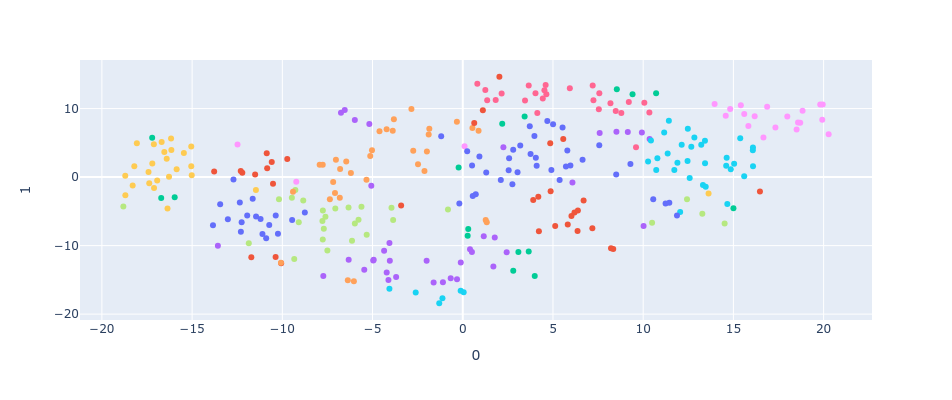

In [279]:
tsne = TSNE(n_components=2, random_state=25)
projections = tsne.fit_transform(X1)

color_palette = sns.color_palette('husl', len(sclabels))
fig = px.scatter(
    projections, x=0, y=1, color=[color_palette[x] for x in sclabels],
    width=800, height=400, labels=set(sclabels),
)
fig.update_traces(marker_size=6)
fig.update_layout(showlegend=False)
fig.show()

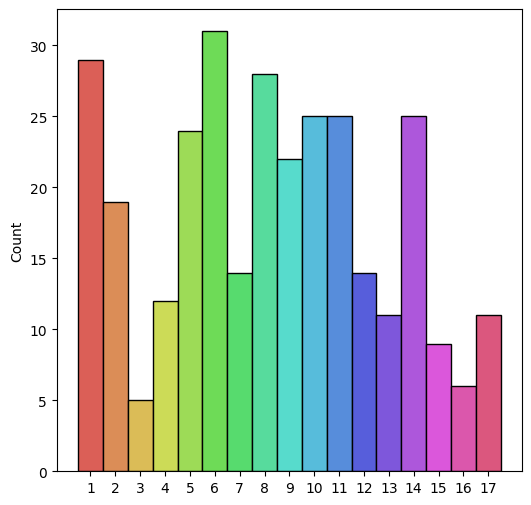

In [280]:
fig, ax =  plt.subplots(1, 1, figsize=(6,6))
sns.histplot(data=sclabels, ax=ax, bins=K, discrete=True, element='bars',)
color_palette = sns.color_palette('hls', len(set(sclabels)))
for patch, color in zip(ax.patches, color_palette):
    patch.set_facecolor(color)

ax.set_xticks([i for i in range (1, len(set(sclabels)) + 1)])
plt.show()

##### Relatively unrelated: further attempts at visualization: UMAP
UMAP is known to represent better the feature space by using "more true" lower-dimensional distances between observations, but some parameters still need tuning; for example, minimum distance between elements decides how much of the local structure between observations should be preserved. Outliers do impact UMAP. 

In [281]:
df = pd.read_csv('CleanData/HSS_kmeans.csv', sep=';')[['UserID'] + cols + categorical]    
cl_df  = preprocess_data(df)

X1 = cl_df[cols + categorical]
X1.columns

Index(['level', 'exp', 'rocket', 'glider', 'friends', 'likes', 'GameTime',
       'NumberOfAnnotatedGraffiti', 'totalAnnotatedGraffiti', 'Graffiti_avgt',
       'NumberOfDialoguesActivated', 'totalAnnotatedDialogues',
       'Dialogue_avgt', 'Age', 'Gender', 'Education', 'General engagement',
       'GenderEnvironment'],
      dtype='object')

In [ ]:
import umap

In [ ]:
mindistances = [i/10 for i in range(1, 11,)]
fig, axs =  plt.subplots(5, 2, figsize=(20,25)) 
c = 0
color_palette = sns.color_palette('hls', len(set(sclabels)) + 1)
color_palette.reverse()
for ax, el in zip(axs.flatten(), mindistances):
    reducer = umap.UMAP(n_neighbors=9, min_dist=el, random_state=25, n_jobs=1, metric='euclidean' , n_epochs=400)
    projection = reducer.fit_transform(X1)    
    sns.scatterplot(x=projection[:, 0], y=projection[:, 1], c=[color_palette[x] for x in sclabels], 
                    s=25, ax=ax)
    ax.set_title(f'Min dist = {el}')
plt.show()